Cluster centers:
 [[1.80161587e+02 2.59651436e+06]
 [1.78874588e+02 1.51909333e+07]
 [1.75745935e+02 4.94874783e+06]]


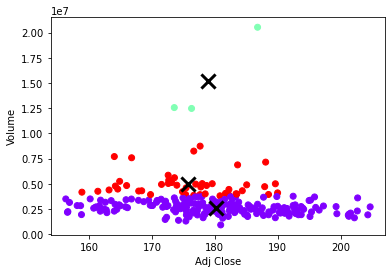

In [86]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the dataset
data = pd.read_csv('Financial.csv')

# Select the features you want to use for clustering
X = data[['Adj Close', 'Volume', ]]

# Perform k-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Get the labels for each data point
labels = kmeans.labels_

# Add the labels to the original dataset
data['cluster'] = labels

# View the cluster centers
centers = kmeans.cluster_centers_
print("Cluster centers:\n", centers)
import matplotlib.pyplot as plt

# Scatter plot the data points colored by their assigned cluster
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='rainbow')

# Plot the cluster centers
plt.scatter(centers[:, 0], centers[:, 1], marker='x', s=200, linewidths=3, color='black')

# Add axis labels
plt.xlabel('Adj Close')
plt.ylabel('Volume')

# Show the plot
plt.show()

In [93]:
# Select AMZN stock data
# Read the CSV file
data = pd.read_csv('Financial.csv')

# Select the rows corresponding to the 'AMZN' sheet
AMZN = data.iloc[1:]

# Select the features you want to use for clustering
X_cluster = data[['Adj Close', 'Volume']]
# Add the labels to the original dataset
X_cluster['cluster'] = labels

# Select the target variable
y = data['Close']

# Fit a linear regression model to the data
model = LinearRegression()
model.fit(X_cluster, y)

# Print the model coefficients
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

# Fit a linear regression model to the data
X_cluster = sm.add_constant(X_cluster)
model = sm.OLS(y, X_cluster).fit()

# Print the model summary
print(model.summary())



Coefficients: [ 9.67770334e-01 -1.17146491e-07  2.19059972e-01]
Intercept: 8.700571860585171
                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     2817.
Date:                Fri, 05 May 2023   Prob (F-statistic):          1.17e-190
Time:                        14:11:58   Log-Likelihood:                -497.09
No. Observations:                 251   AIC:                             1002.
Df Residuals:                     247   BIC:                             1016.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

/var/folders/h5/v3qyf40113lctbtb5g8k2k340000gn/T/ipykernel_70912/2543881606.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cluster['cluster'] = labels


In [26]:
# Read the CSV file
df = pd.read_csv('Financial.csv', index_col='Date', parse_dates=True)

# Calculate daily returns for each stock
returns = df.pct_change()

# Add a new 'return' column to the DataFrame
df['return'] = returns['Adj Close']

# Drop the first row (since there is no return for the first day)
df = df.dropna()

# View the first few rows of the updated DataFrame
print(df.head())


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-04-29  186.149994  188.539993  179.559998  179.979996  173.948242   
2022-05-02  180.279999  180.990005  175.220001  178.580002  172.595184   
2022-05-03  179.240005  179.960007  176.550003  178.119995  172.150589   
2022-05-04  178.059998  184.210007  177.009995  183.800003  177.640228   
2022-05-05  181.649994  183.339996  177.820007  179.789993  173.764618   

             Volume    return  
Date                           
2022-04-29  4853500 -0.053534  
2022-05-02  5026600 -0.007779  
2022-05-03  3266300 -0.002576  
2022-05-04  3920500  0.031889  
2022-05-05  3249700 -0.021817  


In [31]:

# Read the CSV file
data = pd.read_csv('Financial.csv')

# Select the rows corresponding to the 'AMZN' sheet
AMZN = data.iloc[1:]

# Calculate daily returns for AMZN
AMZN['Return'] = AMZN['Adj Close'].pct_change()

# Drop the first row (since there is no return for the first day)
AMZN = AMZN.dropna()

# View the returns
print(AMZN.head())



       Date        Open        High         Low       Close   Adj Close  \
2  5/2/2022  180.279999  180.990005  175.220001  178.580002  172.595184   
3  5/3/2022  179.240005  179.960007  176.550003  178.119995  172.150589   
4  5/4/2022  178.059998  184.210007  177.009995  183.800003  177.640228   
5  5/5/2022  181.649994  183.339996  177.820007  179.789993  173.764618   
6  5/6/2022  179.139999  181.050003  175.660004  179.919998  173.890259   

    Volume    Return  
2  5026600 -0.007779  
3  3266300 -0.002576  
4  3920500  0.031889  
5  3249700 -0.021817  
6  2826600  0.000723  


/var/folders/h5/v3qyf40113lctbtb5g8k2k340000gn/T/ipykernel_70912/790065912.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AMZN['Return'] = AMZN['Adj Close'].pct_change()


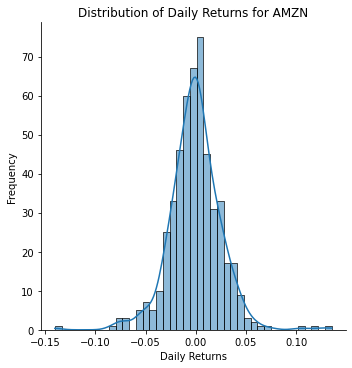

Mean Daily Return: -0.00063726866387762
Standard Deviation of Daily Return: 0.025729389715897808


In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
df = pd.read_csv('AMZN.csv', index_col='Date', parse_dates=True)

# Calculate daily returns for the AMZN stock
returns = df['Adj Close'].pct_change()

# Plot the histogram of returns
sns.displot(returns, kde=True)
plt.title('Distribution of Daily Returns for AMZN')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.show()

# Calculate the mean and standard deviation of returns
mean_return = returns.mean()
std_return = returns.std()

print('Mean Daily Return:', mean_return)
print('Standard Deviation of Daily Return:', std_return)

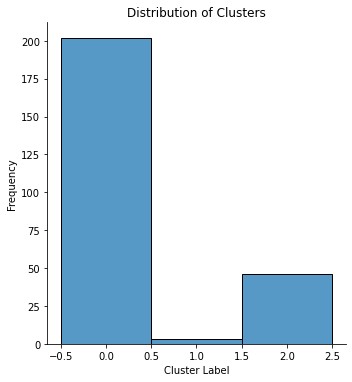

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Read the CSV file
df = pd.read_csv('Financial.csv', index_col='Date', parse_dates=True)

# Select the features you want to use for clustering
X = df[['Adj Close', 'Volume']]

# Perform k-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Get the labels for each data point
labels = kmeans.labels_

# Plot the histogram of labels
sns.displot(labels, discrete=True)
plt.title('Distribution of Clusters')
plt.xlabel('Cluster Label')
plt.ylabel('Frequency')
plt.show()

In [68]:
# Calculate moving averages for different time periods
ma5 = df['Adj Close'].rolling(window=5).mean()
ma10 = df['Adj Close'].rolling(window=10).mean()
ma20 = df['Adj Close'].rolling(window=20).mean()
ma50 = df['Adj Close'].rolling(window=50).mean()
ma100 = df['Adj Close'].rolling(window=100).mean()
ma200 = df['Adj Close'].rolling(window=200).mean()

# Print the moving averages for each time period
print("5-day moving average:\n", ma5)
print("10-day moving average:\n", ma10)
print("20-day moving average:\n", ma20)
print("50-day moving average:\n", ma50)
print("100-day moving average:\n", ma100)
print("200-day moving average:\n", ma200)

5-day moving average:
 Date
2021-04-27           NaN
2021-04-28           NaN
2021-04-29           NaN
2021-04-30           NaN
2021-05-03    172.011502
                 ...    
2023-04-20    103.132001
2023-04-21    104.022000
2023-04-24    104.716000
2023-04-25    104.770000
2023-04-26    104.906000
Name: Adj Close, Length: 504, dtype: float64
10-day moving average:
 Date
2021-04-27           NaN
2021-04-28           NaN
2021-04-29           NaN
2021-04-30           NaN
2021-05-03           NaN
                 ...    
2023-04-20    102.004000
2023-04-21    102.494000
2023-04-24    102.898000
2023-04-25    103.163001
2023-04-26    103.878001
Name: Adj Close, Length: 504, dtype: float64
20-day moving average:
 Date
2021-04-27         NaN
2021-04-28         NaN
2021-04-29         NaN
2021-04-30         NaN
2021-05-03         NaN
                ...   
2023-04-20    101.2580
2023-04-21    101.6705
2023-04-24    102.0745
2023-04-25    102.3010
2023-04-26    102.6880
Name: Adj Close, Leng

In [69]:
# Calculate the distance from the moving averages for each time period
dist_ma5 = df['Adj Close'] - ma5
dist_ma10 = df['Adj Close'] - ma10
dist_ma20 = df['Adj Close'] - ma20
dist_ma50 = df['Adj Close'] - ma50
dist_ma100 = df['Adj Close'] - ma100
dist_ma200 = df['Adj Close'] - ma200

# Print the distance from the moving averages for each time period
print("Distance from 5-day moving average:\n", dist_ma5)
print("Distance from 10-day moving average:\n", dist_ma10)
print("Distance from 20-day moving average:\n", dist_ma20)
print("Distance from 50-day moving average:\n", dist_ma50)
print("Distance from 100-day moving average:\n", dist_ma100)
print("Distance from 200-day moving average:\n", dist_ma200)

Distance from 5-day moving average:
 Date
2021-04-27         NaN
2021-04-28         NaN
2021-04-29         NaN
2021-04-30         NaN
2021-05-03   -2.687009
                ...   
2023-04-20    0.677997
2023-04-21    2.937999
2023-04-24    1.493999
2023-04-25   -2.200000
2023-04-26    0.074003
Name: Adj Close, Length: 504, dtype: float64
Distance from 10-day moving average:
 Date
2021-04-27         NaN
2021-04-28         NaN
2021-04-29         NaN
2021-04-30         NaN
2021-05-03         NaN
                ...   
2023-04-20    1.805998
2023-04-21    4.465999
2023-04-24    3.311999
2023-04-25   -0.593001
2023-04-26    1.102002
Name: Adj Close, Length: 504, dtype: float64
Distance from 20-day moving average:
 Date
2021-04-27         NaN
2021-04-28         NaN
2021-04-29         NaN
2021-04-30         NaN
2021-05-03         NaN
                ...   
2023-04-20    2.551998
2023-04-21    5.289499
2023-04-24    4.135499
2023-04-25    0.269000
2023-04-26    2.292003
Name: Adj Close, Length

In [71]:
# Calculate standard deviation of the stock
std = df['Close'].std()
print(std)

31.408318029079926


In [85]:
# Create signals based on moving averages
df['signal_ma5'] = df['dist_ma5'].apply(lambda x: 'buy' if x > 0 else 'sell')
df['signal_ma10'] = df['dist_ma10'].apply(lambda x: 'buy' if x > 0 else 'sell')
df['signal_ma20'] = df['dist_ma20'].apply(lambda x: 'buy' if x > 0 else 'sell')
df['signal_ma50'] = df['dist_ma50'].apply(lambda x: 'buy' if x > 0 else 'sell')
df['signal_ma100'] = df['dist_ma100'].apply(lambda x: 'buy' if x > 0 else 'sell')
df['signal_ma200'] = df['dist_ma200'].apply(lambda x: 'buy' if x > 0 else 'sell')

# Print the signals for each time period
print("Signal based on 5-day moving average:\n", df['signal_ma5'])
print("Signal based on 10-day moving average:\n", df['signal_ma10'])
print("Signal based on 20-day moving average:\n", df['signal_ma20'])
print("Signal based on 50-day moving average:\n", df['signal_ma50'])
print("Signal based on 100-day moving average:\n", df['signal_ma100'])
print("Signal based on 200-day moving average:\n", df['signal_ma200'])

Signal based on 5-day moving average:
 Date
2021-04-27    sell
2021-04-28    sell
2021-04-29    sell
2021-04-30    sell
2021-05-03    sell
              ... 
2023-04-20     buy
2023-04-21     buy
2023-04-24     buy
2023-04-25    sell
2023-04-26     buy
Name: signal_ma5, Length: 504, dtype: object
Signal based on 10-day moving average:
 Date
2021-04-27    sell
2021-04-28    sell
2021-04-29    sell
2021-04-30    sell
2021-05-03    sell
              ... 
2023-04-20     buy
2023-04-21     buy
2023-04-24     buy
2023-04-25    sell
2023-04-26     buy
Name: signal_ma10, Length: 504, dtype: object
Signal based on 20-day moving average:
 Date
2021-04-27    sell
2021-04-28    sell
2021-04-29    sell
2021-04-30    sell
2021-05-03    sell
              ... 
2023-04-20     buy
2023-04-21     buy
2023-04-24     buy
2023-04-25     buy
2023-04-26     buy
Name: signal_ma20, Length: 504, dtype: object
Signal based on 50-day moving average:
 Date
2021-04-27    sell
2021-04-28    sell
2021-04-29    sell
